<a href="https://colab.research.google.com/github/veerasolaiyappan/blog/blob/master/Datascience_CodingTest_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Covid-19 Dataset

  This datasets of daily time-series data related to COVID-19 for 50+ countries around the world. The data is at the spatial resolution of states/provinces for most regions and at county/municipality resolution for Argentina, Brazil, Chile, Colombia, Czech Republic, Mexico, Netherlands, Peru, United Kingdom, and USA. All regions are assigned a unique location key, which resolves discrepancies between ISO / NUTS / FIPS codes, etc. The different aggregation levels are:
  

*   Country
*   Province, state, or local equivalent
*   Municipality, county, or local equivalent
*   Locality which may not follow strict hierarchical order, such as "city" or "nursing homes in X location"

    






In [4]:
from __future__ import print_function
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

covid_main_dataset = pd.read_csv("https://storage.googleapis.com/covid19-open-data/v2/main.csv", sep=",")
covid_main_dataset.describe()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,3,6,8,9,10,11,92) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,aggregation_level,school_closing,workplace_closing,cancel_public_events,restrictions_on_gatherings,public_transport_closing,stay_at_home_requirements,restrictions_on_internal_movement,international_travel_controls,income_support,debt_relief,fiscal_measures,international_support,public_information_campaigns,testing_policy,contact_tracing,emergency_investment_in_healthcare,investment_in_vaccines,stringency_index,population,population_male,population_female,rural_population,urban_population,largest_city_population,clustered_population,population_density,human_development_index,population_age_00_09,population_age_10_19,population_age_20_29,population_age_30_39,population_age_40_49,population_age_50_59,population_age_60_69,population_age_70_79,population_age_80_89,population_age_90_99,noaa_station,noaa_distance,...,total_recovered,total_tested,new_hospitalized,total_hospitalized,current_hospitalized,new_intensive_care,total_intensive_care,current_intensive_care,new_ventilator,total_ventilator,current_ventilator,open_street_maps,latitude,longitude,elevation,area,rural_area,urban_area,gdp,gdp_per_capita,human_capital_index,mobility_retail_and_recreation,mobility_grocery_and_pharmacy,mobility_parks,mobility_transit_stations,mobility_workplaces,mobility_residential,life_expectancy,smoking_prevalence,diabetes_prevalence,infant_mortality_rate,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate,hospital_beds,nurses,physicians,health_expenditure,out_of_pocket_health_expenditure
count,3.640153e+06,35701.000000,35705.000000,35697.000000,35683.000000,35699.000000,35703.000000,35686.000000,35685.000000,35651.000000,35680.000000,3.561300e+04,3.562600e+04,35685.000000,35690.000000,35656.000000,3.559300e+04,3.559400e+04,35691.000000,1.972333e+06,3.950100e+05,3.950100e+05,4.451700e+04,4.451700e+04,3.176800e+04,2.528900e+04,44308.000000,80047.000000,3.939650e+05,3.939650e+05,3.939650e+05,3.939650e+05,3.939650e+05,3.939650e+05,3.939650e+05,3.939650e+05,3.939650e+05,3.939650e+05,1.763926e+06,1.763926e+06,...,8.154400e+04,4.866300e+04,135829.000000,135851.000000,23064.000000,12289.000000,11713.000000,22366.000000,2160.000000,1581.000000,2460.000000,8.648420e+05,2.342472e+06,2.342472e+06,1.369159e+06,1.981320e+06,3.741100e+04,37411.000000,4.786100e+04,4.827900e+04,32604.000000,427478.000000,404467.000000,233469.000000,291237.000000,552766.000000,313894.000000,44308.000000,30514.000000,43681.000000,40337.000000,39501.000000,39501.000000,38247.000000,38247.000000,5225.000000,37620.000000,34276.000000,38874.000000,38874.000000
mean,1.903485e+00,1.629646,1.137572,1.145054,1.841914,0.561220,0.837045,0.829821,2.348914,0.546268,0.687080,2.891829e+08,2.469819e+07,1.468993,1.151331,0.979891,1.748049e+07,3.621225e+05,45.739483,1.458035e+06,3.504860e+06,3.452126e+06,1.591651e+07,1.997289e+07,4.484559e+06,1.489624e+07,453.150563,0.673279,1.137476e+06,1.088305e+06,1.081183e+06,1.071831e+06,9.119425e+05,8.021235e+05,5.725680e+05,3.069731e+05,1.180349e+05,2.950875e+04,7.386455e+10,4.595000e+01,...,2.363009e+04,2.283314e+05,6.787012,457.145910,572.420395,5.247457,371.167335,99.870741,0.456019,55.626818,178.522358,1.618626e+06,1.766404e+01,-6.625915e+01,1.345601e+03,1.834618e+05,6.244176e+05,20204.055866,4.668522e+11,2.389597e+04,0.567212,-18.740934,-3.278735,6.527149,-23.788976,-24.355143,10.346827,73.059700,21.632877,8.360287,21.384974,185.241931,122.430323,92.212568,18.878142,3.028000,4.393377,1.918615,1081.069390,228.803268
std,3.409573e-01,1.416462,1.163603,0.954696,1.759766,0.776081,0.979825,0.924129,1.652961,0.746012,0.837663,1.481923e+10,4.424158e+09,0.844729,0.981171,0.855392,1.473404e+09,1.914319e+07,34.557616,2.202663e+07,2.523563e+07,2.383305e+07,7.354858e+07,7.137228e+07,5.995942e+06,4.390524e+07,2065.343507,0.121249,7.816576e+06,7.785293e+06,7.782965e+06,8.005698e+06,6.825500e+06,6.368260e+06,4.341637e+06,2.132623e+06,7.189529e+05,1.797382e+05,1.590769e+10,4.035049e+01,...,5.946854e+05,1.402167e+06,67

###Getting First Six Months Dataset

In [47]:
January = pd.DataFrame(covid_main_dataset[0:31])
February = pd.DataFrame(covid_main_dataset[31:60])
March = pd.DataFrame(covid_main_dataset[60:91])
April = pd.DataFrame(covid_main_dataset[91:121])
May = pd.DataFrame(covid_main_dataset[121:152])
June =  pd.DataFrame(covid_main_dataset[152:182])



Filtering Data columns. Having only three coulums data
Date, Health Expenditure, Out of Pocket Health expenditure

In [48]:
# January.head()
January = January[['date','health_expenditure','out_of_pocket_health_expenditure']]
February = February[['date','health_expenditure','out_of_pocket_health_expenditure']]
March = March[['date','health_expenditure','out_of_pocket_health_expenditure']]
April = April[['date','health_expenditure','out_of_pocket_health_expenditure']]
May = May[['date','health_expenditure','out_of_pocket_health_expenditure']]
June = June[['date','health_expenditure','out_of_pocket_health_expenditure']]

print(March)

          date  health_expenditure  out_of_pocket_health_expenditure
60  2020-03-01         4040.786621                        1688.12146
61  2020-03-02         4040.786621                        1688.12146
62  2020-03-03         4040.786621                        1688.12146
63  2020-03-04         4040.786621                        1688.12146
64  2020-03-05         4040.786621                        1688.12146
65  2020-03-06         4040.786621                        1688.12146
66  2020-03-07         4040.786621                        1688.12146
67  2020-03-08         4040.786621                        1688.12146
68  2020-03-09         4040.786621                        1688.12146
69  2020-03-10         4040.786621                        1688.12146
70  2020-03-11         4040.786621                        1688.12146
71  2020-03-12         4040.786621                        1688.12146
72  2020-03-13         4040.786621                        1688.12146
73  2020-03-14         4040.786621

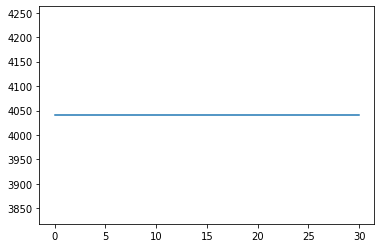

In [15]:
January.plot()

1 - Write a function in python that inputs a dataframe and identify which columns have date in them. Using these date columns make new columns which are difference between these columns taking 2 at a time. (for instance if there is date1, date2, date3 columns, output should be like date1-date2, date2-date3, date1-date3)

In [30]:
print(January['date'])

0     2020-01-01
1     2020-01-02
2     2020-01-03
3     2020-01-04
4     2020-01-05
5     2020-01-06
6     2020-01-07
7     2020-01-08
8     2020-01-09
9     2020-01-10
10    2020-01-11
11    2020-01-12
12    2020-01-13
13    2020-01-14
14    2020-01-15
15    2020-01-16
16    2020-01-17
17    2020-01-18
18    2020-01-19
19    2020-01-20
20    2020-01-21
21    2020-01-22
22    2020-01-23
23    2020-01-24
24    2020-01-25
25    2020-01-26
26    2020-01-27
27    2020-01-28
28    2020-01-29
29    2020-01-30
30    2020-01-31
Name: date, dtype: object


In [36]:
from itertools import combinations


data = {
        'date1':  January['date'],
        'date2':  February['date'],
        'date3' : March['date']
        }

Date_frame = pd.DataFrame(data, columns = ['date1','date2','date3'])

# print(Date_frame)

# Creating a new pd.DataFrame
new_df = pd.DataFrame(index=Date_frame.index)

# list of columns
columns = Date_frame.columns

# Create all combinations of length 2 . eg. AB, BC, etc.
for combination in combinations(columns, 2):
    combination_string = "".join(combination)
    new_df[combination_string] = Date_frame[combination[1]]-Date_frame[combination[0]]
print(new_df)

   date1date2 date1date3 date2date3
0         NaN        NaN        NaN
1         NaN        NaN        NaN
2         NaN        NaN        NaN
3         NaN        NaN        NaN
4         NaN        NaN        NaN
..        ...        ...        ...
86        NaN        NaN        NaN
87        NaN        NaN        NaN
88        NaN        NaN        NaN
89        NaN        NaN        NaN
90        NaN        NaN        NaN

[91 rows x 3 columns]


2 - A python function which take a dataframe as input and deals with the issue of outliers in all the continuous variables.

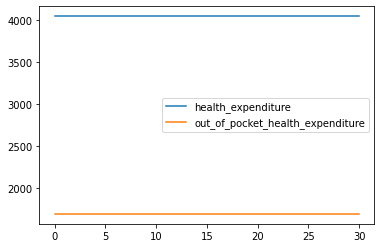

In [49]:
from scipy.stats import mstats

January.plot()


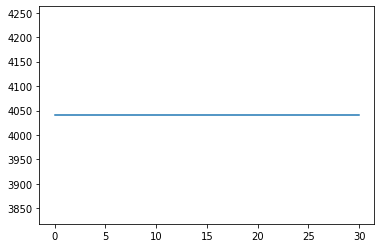

In [54]:
# Truncate values to the 5th and 95th percentiles health_expenditure  out_of_pocket_health_expenditure
transformed_test_data = pd.Series(mstats.winsorize(January['health_expenditure'], limits=[0.05, 0.05])) 
transformed_test_data.plot()

3 - Write a function in python that take dataframe as input and drop columns having Pearson correlation more than 0.85 

In [44]:
January = covid_main_dataset[0:31]
 
# Create pearson correlation matrix
corr_matrix = January.corr(method='pearson').abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.85
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]

print(to_drop)

# Drop features 
January.drop(to_drop, axis=1, inplace=True)

January.head()



['human_development_index', 'longitude', 'diabetes_prevalence', 'infant_mortality_rate', 'nurses', 'physicians', 'out_of_pocket_health_expenditure']


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,key,date,wikidata,datacommons,country_code,country_name,subregion1_code,subregion1_name,subregion2_code,subregion2_name,locality_code,locality_name,3166-1-alpha-2,3166-1-alpha-3,aggregation_level,school_closing,workplace_closing,cancel_public_events,restrictions_on_gatherings,public_transport_closing,stay_at_home_requirements,restrictions_on_internal_movement,international_travel_controls,income_support,debt_relief,fiscal_measures,international_support,public_information_campaigns,testing_policy,contact_tracing,emergency_investment_in_healthcare,investment_in_vaccines,stringency_index,population,population_male,population_female,rural_population,urban_population,largest_city_population,clustered_population,...,new_deceased,new_recovered,new_tested,total_confirmed,total_deceased,total_recovered,total_tested,new_hospitalized,total_hospitalized,current_hospitalized,new_intensive_care,total_intensive_care,current_intensive_care,new_ventilator,total_ventilator,current_ventilator,open_street_maps,latitude,elevation,area,rural_area,urban_area,gdp,gdp_per_capita,human_capital_index,mobility_retail_and_recreation,mobility_grocery_and_pharmacy,mobility_parks,mobility_transit_stations,mobility_workplaces,mobility_residential,related_locality,life_expectancy,smoking_prevalence,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate,hospital_beds,health_expenditure
0,AD,2020-01-01,Q228,country/AND,AD,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,AD,AND,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,77142.0,58614.0,55571.0,9269.0,67873.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9407.0,42.558333,NaN,470.0,NaN,NaN,3.154058e+09,40886.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.5,NaN,NaN,NaN,NaN,NaN,4040.786621
1,AD,2020-01-02,Q228,country/AND,AD,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,AD,AND,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,77142.0,58614.0,55571.0,9269.0,67873.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9407.0,42.558333,NaN,470.0,NaN,NaN,3.154058e+09,40886.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.5,NaN,NaN,NaN,NaN,NaN,4040.786621
2,AD,2020-01-03,Q228,country/AND,AD,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,AD,AND,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,77142.0,58614.0,55571.0,9269.0,67873.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9407.0,42.558333,NaN,470.0,NaN,NaN,3.154058e+09,40886.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.5,NaN,NaN,NaN,NaN,NaN,4040.786621
3,AD,2020-01-04,Q228,country/AND,AD,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,AD,AND,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,77142.0,58614.0,55571.0,9269.0,67873.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9407.0,42.558333,NaN,470.0,NaN,NaN,3.154058e+09,40886.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.5,NaN,NaN,NaN,NaN,NaN,4040.786621
4,AD,2020-01-05,Q228,country/AND,AD,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,AD,AND,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,77142.0,58614.0,55571.0,9269.0,67873.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9407.0,42.558333,NaN,470.0,NaN,NaN,3.154058e+09,40886.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.5,NaN,NaN,NaN,NaN,NaN,4040.786621
